In [1]:
import numpy as np
import pymatgen as pymat
import mendeleev as mendel
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from random import shuffle
import matplotlib.pyplot as plt
from pymatgen.core.periodic_table import Element

fcc_elements = ["Ag", "Al", "Au", "Cu", "Ir", "Ni", "Pb", "Pd", "Pt", "Rh", "Th", "Yb"]
bcc_elements = ["Ba", "Cr", "Eu", "Fe", "Li", "Mn", "Mo", "Na", "Nb", "Ta", "V", "W" ]
hcp_elements = ["Be", "Ca", "Cd", "Co", "Dy", "Er", "Gd", "Hf", "Ho", "Lu", "Mg", "Re", 
                "Ru", "Sc", "Tb", "Ti", "Tl", "Tm", "Y", "Zn", "Zr"]
others = ["Sb", "Sm", "Bi", "Ce", "Sn", "Si"]
# Others (Solids): "Sb", "Sm", Bi" and "As" are Rhombohedral; "C" , "Ce" and "Sn" are Allotropic; 
# "Si" and "Ge" are Face-centered diamond-cubic;

elements = fcc_elements + bcc_elements + hcp_elements + others

# This function randomly arranges the elements so we can have representation for all groups both in the training and testing set
shuffle(elements) 

data_youngs_modulus = []
data_lattice_constant = []
data_melting_point = []
data_specific_heat = []
data_atomic_mass = []
data_CTE = []

for item in elements:
    data_youngs_modulus.append(Element(item).youngs_modulus)
    data_lattice_constant.append(mendel.element(item).lattice_constant)
    data_melting_point.append(mendel.element(item).melting_point)
    data_specific_heat.append(mendel.element(item).specific_heat)
    data_atomic_mass.append(Element(item).atomic_mass)
    data_CTE.append(Element(item).coefficient_of_linear_thermal_expansion)

In [2]:
import pandas as pd
df = pd.DataFrame(zip(
    data_youngs_modulus,
    data_lattice_constant,
    data_melting_point,
    data_specific_heat,
    data_atomic_mass,
    data_CTE),
columns=['E','a','Mpt','C','M','alpha'])   
df.index = elements
df

,E,a,Mpt,C,M,alpha
Zr,68.0,3.23,2127.15,0.278,91.224000,0.000006
Co,209.0,2.51,1768.15,0.421,58.933195,0.000013
Zn,108.0,2.66,692.677,0.388,65.409000,0.000030
Si,47.0,5.43,1687.15,0.712,28.085500,0.000003
Ag,83.0,4.09,1234.93,0.235,107.868200,0.000019
Ru,447.0,2.70,2606.15,0.238,101.070000,0.000006
Yb,24.0,5.49,1097.15,0.155,173.040000,0.000026
W,411.0,3.16,3687.15,0.132,183.840000,0.000005
Tl,8.0,3.46,577.15,0.129,204.383300,0.000030
Ni,200.0,3.52,1728.15,0.444,58.693400,0.000013


In [3]:
data=df.drop(['Sn'])

In [4]:
#print(data_youngs_modulus)
#print(data_lattice_constant)
#print(data_melting_point)
#print(data_specific_heat)
#print(data_atomic_mass)
#print(data_CTE)

In [5]:
# Here we will organize the data in a format sk-learn accepts
# We will develop linear models that relate Young's modulus and melting temperature, CTE vs. melting temperature 
# and lattice constant and melting temperature

df_train = data[:44] # This takes the first 44 entries to be the Training Set
df_test = data[-6:] # This takes the last 6 entries to be the Testing Set

# These would be the sets for Melting Point

melt_train = df_train['Mpt'].to_numpy() 
melt_test = df_test['Mpt'].to_numpy() 
# This Reshape function in the next two lines, turns each of the horizontal lists [ x, y, z] into a
# vertical NumPy array [[x]
#                       [y]
#                       [z]]
# This Step is required to work with the Sklearn Linear Model

melt_train = melt_train.reshape(-1,1) 
melt_test = melt_test.reshape(-1,1)

#Each data set will be divided in training and test data
# These would be the sets for Young's Modulus

young_train = df_train['E'].to_numpy() 
young_test = df_test['E'].to_numpy() 
young_train = young_train.reshape(-1,1)
young_test = young_test.reshape(-1,1)

# These would be the sets for Lattice Constants

#lattice_train = data_lattice_constant[:45]
#lattice_test = data_lattice_constant[-6:]
#lattice_train = np.array(lattice_train).reshape(-1,1)
#lattice_test = np.array(lattice_test).reshape(-1,1)

# These would be the sets for Specific Heat

#specheat_train = data_specific_heat[:45]
#specheat_test = data_specific_heat[-6:]
#specheat_train = np.array(specheat_train).reshape(-1,1)
#specheat_test = np.array(specheat_test).reshape(-1,1)

# These would be the sets for Atomic Mass

#mass_train = data_atomic_mass[:45]
#mass_test = data_atomic_mass[-6:]
#mass_train = np.array(mass_train).reshape(-1,1)
#mass_test = np.array(mass_test).reshape(-1,1)

# These would be the sets for CTE

#coefTE_train = data_CTE[:45]
#coefTE_test = data_CTE[-6:]
#coefTE_train = np.array(coefTE_train).reshape(-1,1)
#coefTE_test = np.array(coefTE_test).reshape(-1,1)


In [6]:
def regression(x_train, x_test, y_train, y_test):
    
    # Define the model and train it
    model = linear_model.LinearRegression()
    model.fit(x_train, y_train)
    
    #Join train + test data 
    full_x = np.concatenate((x_train, x_test), axis=0)
    full_y = np.concatenate((y_train, y_test), axis=0)
    
    # Use the model to predict the entire set of data
    predictions = model.predict(full_x) # Make it for all values
    
    # Print model and mean squared error and variance score
    print("Linear Equation: %.4e X + (%.4e)"%(model.coef_, model.intercept_))
    print("Mean squared error: %.4e" % (mean_squared_error(full_y, predictions)))
    print('Variance score: %.4f' % r2_score(full_y, predictions))    
    
    return predictions

In [7]:
import plotly #This is the library import
import plotly.graph_objs as go # This is the graphical object (Think "plt" in Matplotlib if you have used that before)
from plotly.offline import iplot # These lines are necessary to run Plotly in Jupyter Notebooks, but not in a dedicated environment

plotly.offline.init_notebook_mode(connected=True)

def plot(x_train, x_test, y_train, y_test, x_label, y_label, predictions):
    
    # The reshape functions in the next two lines, turns each of the
    # vertical NumPy array [[x]
    #                       [y]
    #                       [z]]
    # into python lists [ x, y, z]
    
    # This step is required to create plots with plotly like we did in the previous tutorial
    
    x_train = x_train.reshape(1,-1).tolist()[0]
    x_test = x_test.reshape(1,-1).tolist()[0]
    y_train = y_train.reshape(1,-1).tolist()[0]
    y_test = y_test.reshape(1,-1).tolist()[0]    
    predictions = predictions.reshape(1,-1).tolist()[0]
    full_x_list = x_train + x_test

    
    # Now we get back to what we know. Remember, to plot in Plotly, we need a layout and at least one trace
    
    layout0= go.Layout(hovermode= 'closest', width = 800, height=600, showlegend=True,  # Hovermode establishes the way the labels that appear when you hover are arranged # Establishing a square plot width=height
    xaxis= dict(title=go.layout.xaxis.Title(text=x_label, font=dict(size=24)), zeroline= False, gridwidth= 1, tickfont=dict(size=18)), # Axis Titles. Removing the X-axis Mark. Adding a Grid
    yaxis= dict(title=go.layout.yaxis.Title(text=y_label, font=dict(size=24)), zeroline= False, gridwidth= 1, tickfont=dict(size=18)), # Axis Titles. Removing the Y-axis Mark. Adding a Grid
    legend=dict(font=dict(size=24))) # Adding a legend
    

    training = go.Scatter(x = x_train, y = y_train, mode = 'markers', 
                          marker= dict(size= 10, color= 'green'), name= "Training Data") 
    # This trace contains the values for the data in the training set
    
    actual = go.Scatter(x = x_test, y = y_test, mode = 'markers', 
                        marker= dict(size= 10, color= 'red'), name= "Testing Data") 
    # This trace contains the values for the data in the testing set

    prediction = go.Scatter(x = full_x_list, y = predictions, mode = 'lines', 
                            line = dict(color = "blue", width = 1.5),name= "Model") 
    # This trace will be the line the model fitted the data to

    data = [training, actual, prediction]
    fig= go.Figure(data, layout=layout0)
    iplot(fig)

C:\Users\ajitp\AppData\Local\Temp\ipykernel_26184\2300985368.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Linear Equation: 1.2142e-01 X + (-8.0255e+01)
Mean squared error: 7.5623e+03
Variance score: 0.5266


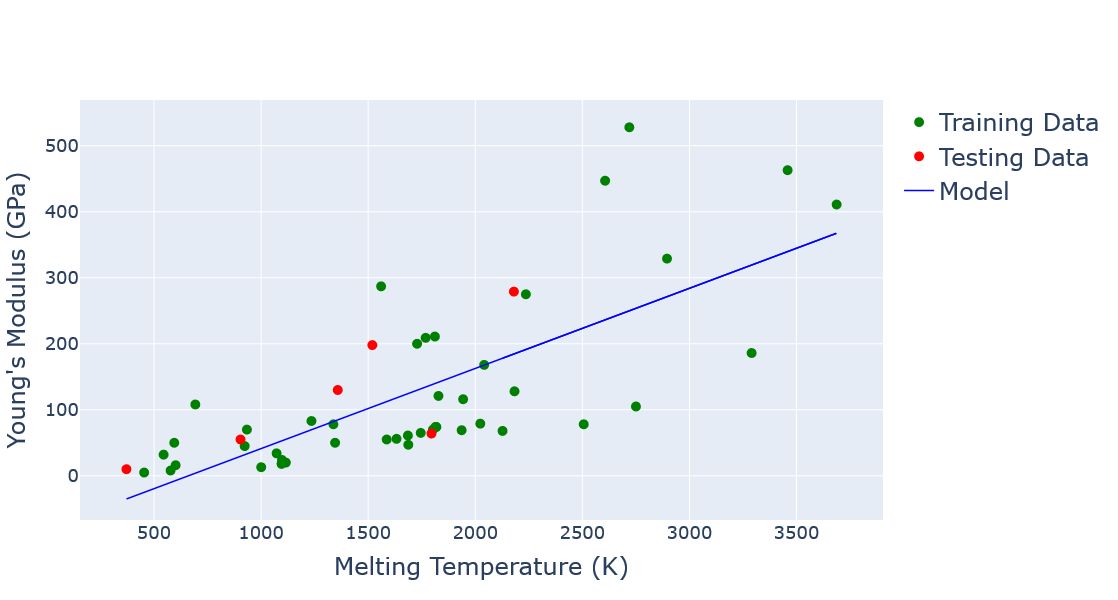

In [8]:
predictions = regression(melt_train, melt_test, young_train, young_test) 
# This line calls the Regression model implemented in the function 

plot(melt_train, melt_test, young_train, young_test, "Melting Temperature (K)", "Young's Modulus (GPa)", predictions) 
# This line plots the results from that model